### INTRO


1. Predict house price - regression
2. Predict whether a client returns a loan - classification(binary)
3. Predict when a patient needs to take medicine - regression
4. Choose what medicine out of available a patient should take - classification(multiclass)
5. Choose segment of clients for a promo communication - classification
6. Recognition of defective products on the production line (based on photo scans) - classification
7. Decide how to place products on a shelf in a store - clustering
8. Search sites for input text query - classification
9. Split customers of a store into segments to understand differences of their behavior - clustering/Dimensionality Reduction
10. Detect anomaly in site traffic - classification


#### 5 examples of the application of ML methods in life

1. classification - Medicine - determine if the disease is witnessed or not on an MRI scan - classification
2. regression - Prediction of level of water in the lake - regression
3. Clustering - grouping customers into groups basing on their behavior
4. Association - customers of this shop who buy X, also tend to buy Y item
5. Dimensionality Reduction - image compression with PCA

Classification:
1. Supervised learning: 1-6, 8
2. Unsupervised learning: 7, 9, 10


#### Multiclass & Multilabel

Multiclass: the item can be assosiated only with one class out of variety of classes(more than 2 classes, not binary)- 1 out of many
vs Multilabel: th item can be assosiated with several target labels out of the variety at the same time.

#### Is an example case with house prices from the theory a classification of a regression problem?

It is a regression task - to predict a price that is based on some features. But we can reduce the regression problem and make it classification by dividing the target into groups(descrete ones).

### Introduction to Data Analysis

In [105]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.tree import DecisionTreeClassifier

In [106]:
data=pd.read_json("../datasets/train.json")
data.shape

(49352, 15)

In [107]:
data.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

#### target column is price

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [109]:
data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [110]:
data_num = data.select_dtypes(include=["number"])
data_num.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


no, there are no empty cells - num of columns(shape)=num of items in info

In [111]:
df = data[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df.head()

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795


### Statistical Data Analysis

Text(0.5, 1.0, 'distribution of price')

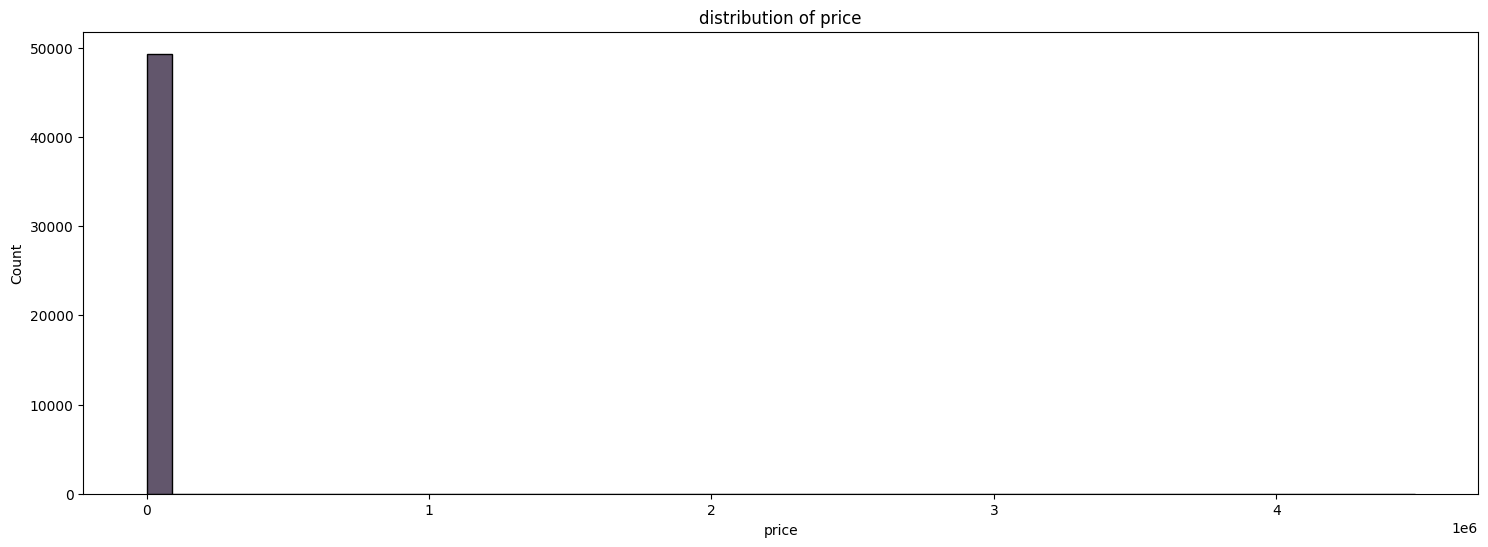

In [112]:
plt.figure(figsize=(18,6))
sns.set_palette("mako")
sns.histplot(data=df, x=df['price'], bins=50)
plt.title('distribution of price')

the distribution is not clear from the histogram

Text(0.5, 1.0, 'boxplot - prices')

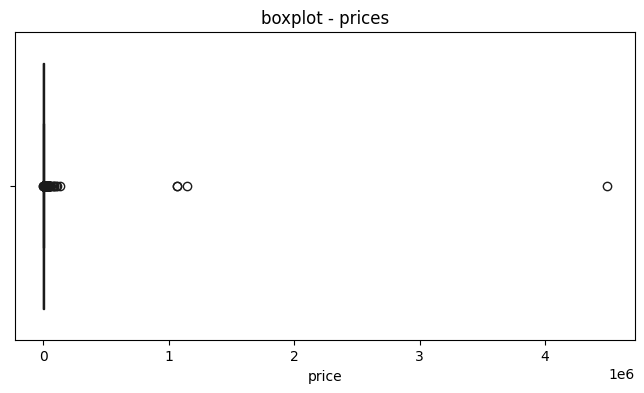

In [113]:
plt.figure(figsize=(8,4))
sns.set_palette("mako")
sns.boxplot(data=df, x='price')
plt.title('boxplot - prices')

there are outliers

In [114]:
df=df[(df['price']>np.percentile(df['price'], 1)) & (df['price']<np.percentile(df['price'],99))]

In [115]:
df.shape


(48343, 4)

Text(0.5, 1.0, 'distribution of price')

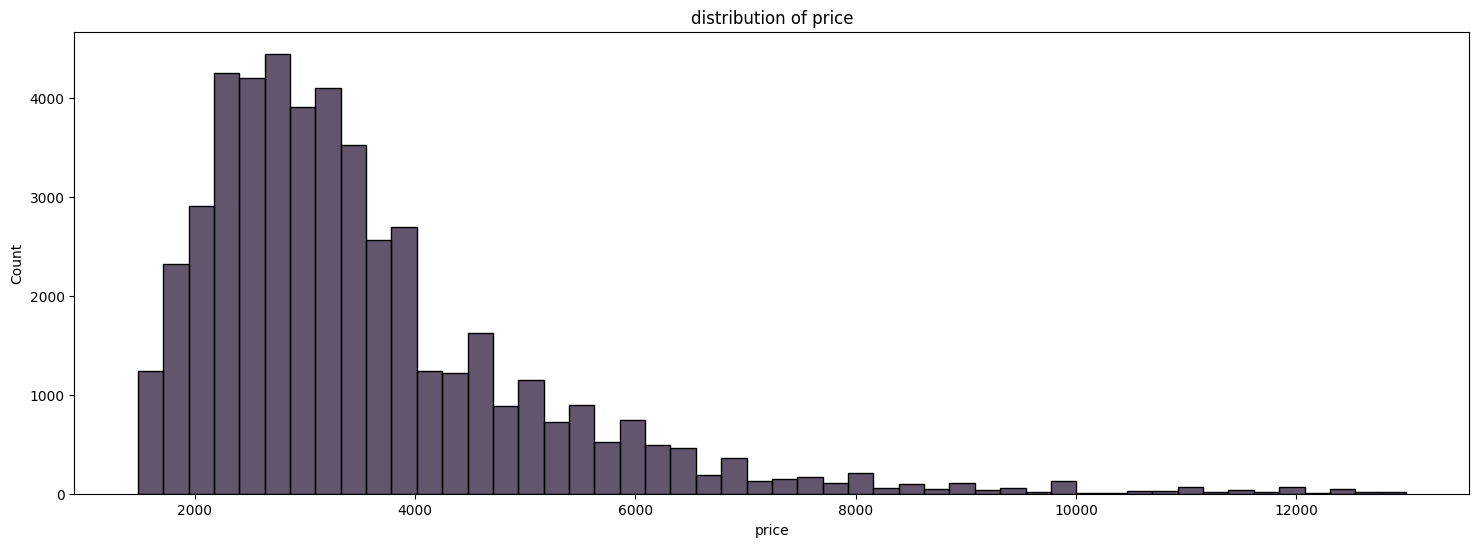

In [116]:
plt.figure(figsize=(18,6))
sns.set_palette("mako")
sns.histplot(data=df, x=df['price'], bins=50)
plt.title('distribution of price')

we reduced the data that less than 1 percentile and more than 99 percentile - there were the biggest outliers

In [117]:
df['interest_level'].dtype   # 'O' - type 'object'

dtype('O')

In [118]:
df['interest_level'].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

In [119]:
df['interest_level'].replace({'low': 0, 'medium': 1, 'high' :2}, inplace=True)
df.head()

/tmp/ipykernel_1349/3257301729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interest_level'].replace({'low': 0, 'medium': 1, 'high' :2}, inplace=True)
/tmp/ipykernel_1349/3257301729.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['interest_level'].replace({'low': 0, 'medium': 1, 'h

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795


Text(0.5, 1.0, 'bedrooms')

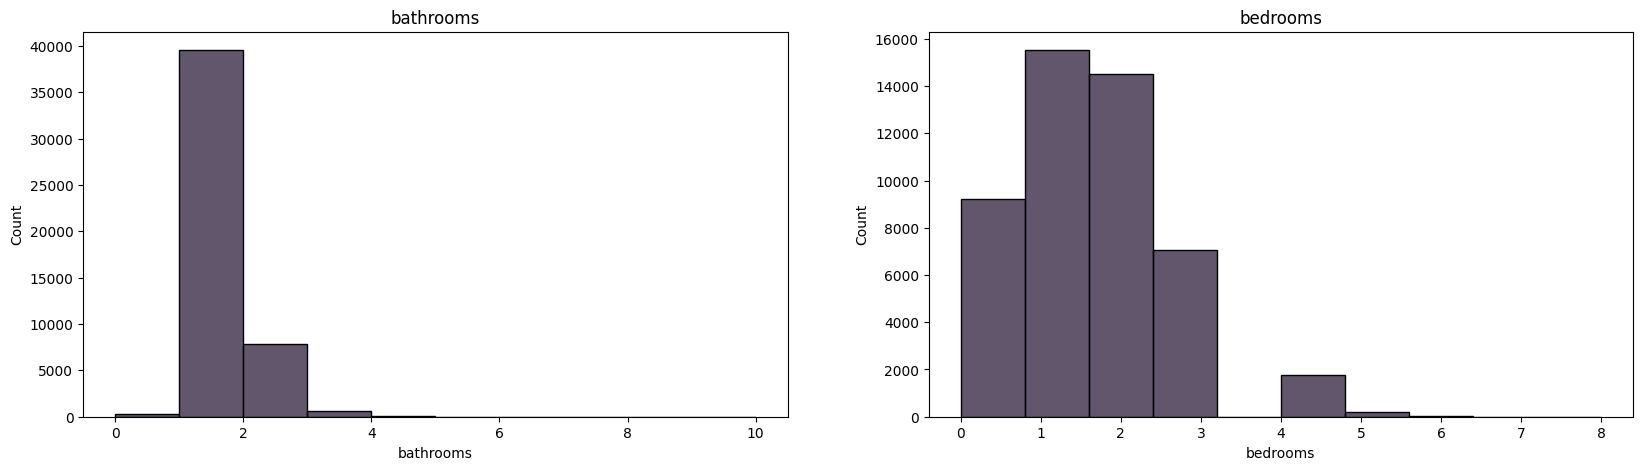

In [120]:
plt.figure(figsize=(20,5))
sns.set_palette("mako")
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df['bathrooms'], bins=10)
plt.title('bathrooms')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x=df['bedrooms'], bins=10)
plt.title('bedrooms')

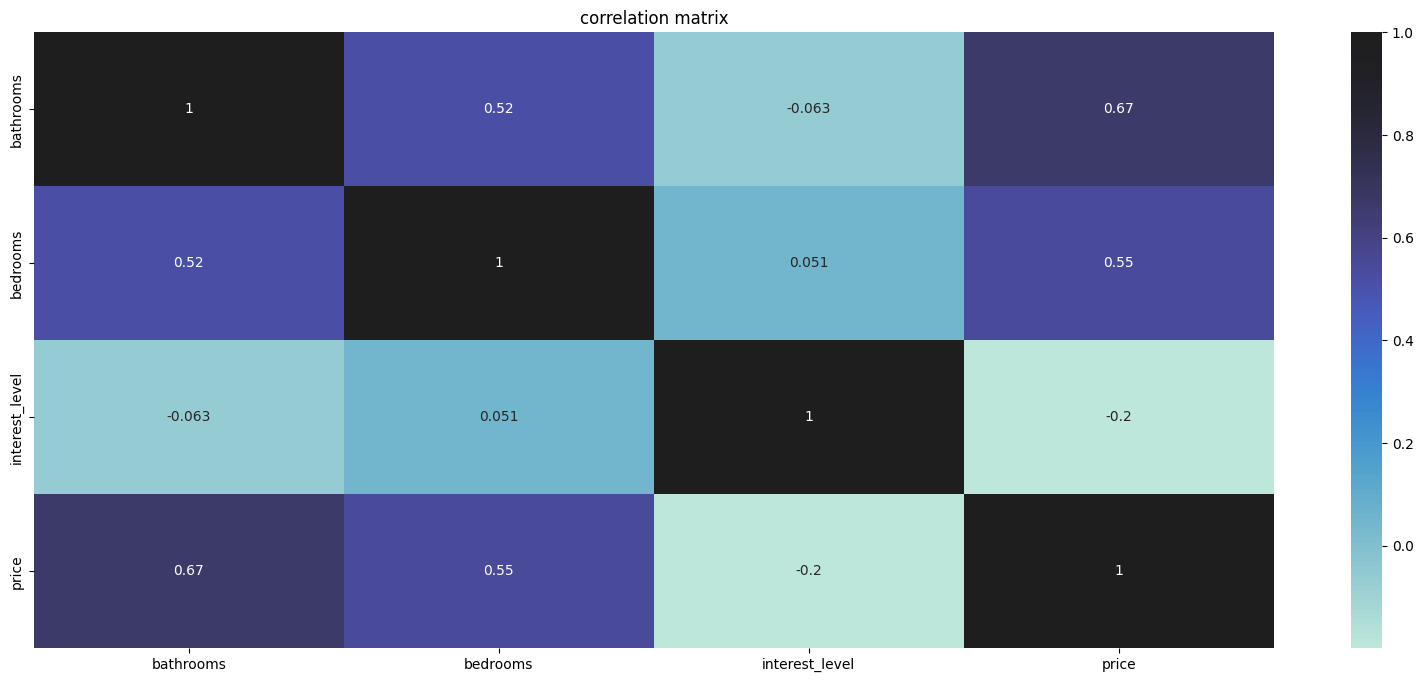

In [121]:
corr=df.corr()
plt.figure(figsize=(20,8))
sns.set_palette("mako")
sns.heatmap(corr, annot=True, center=True)
plt.title('correlation matrix')
plt.show()

Text(0.5, 1.0, 'interest_level&target')

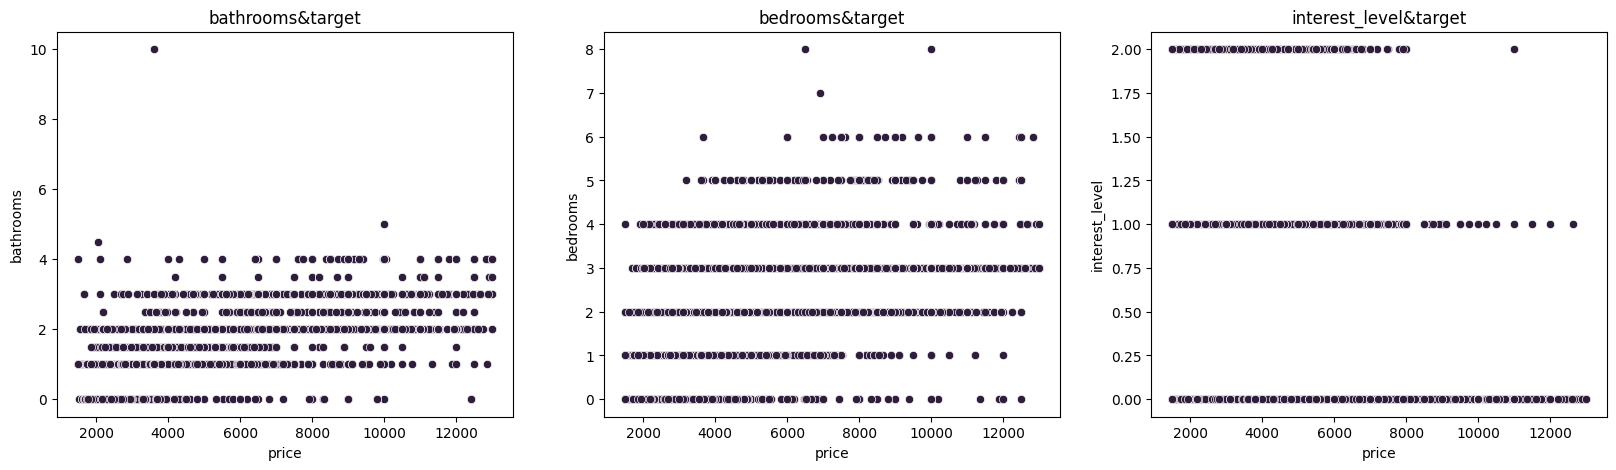

In [122]:
plt.figure(figsize=(20,5))
sns.set_palette("mako")
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x=df['price'], y=df['bathrooms'])
plt.title('bathrooms&target')
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x=df['price'], y=df['bedrooms'])
plt.title('bedrooms&target')
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x=df['price'], y=df['interest_level'])
plt.title('interest_level&target')

### Creating Features

In [123]:
df['bathrooms_squared']=df['bathrooms']**2
df['bedrooms_squared']=df['bedrooms']**2
df['interest_level_squared']=df['interest_level']**2
squared=df[['bathrooms_squared','bedrooms_squared', 'interest_level_squared','price',]]
squared.head()

,bathrooms_squared,bedrooms_squared,interest_level_squared,price
4,1.00,1,1,2400
6,1.00,4,0,3800
9,1.00,4,1,3495
10,2.25,9,1,3000
15,1.00,0,0,2795


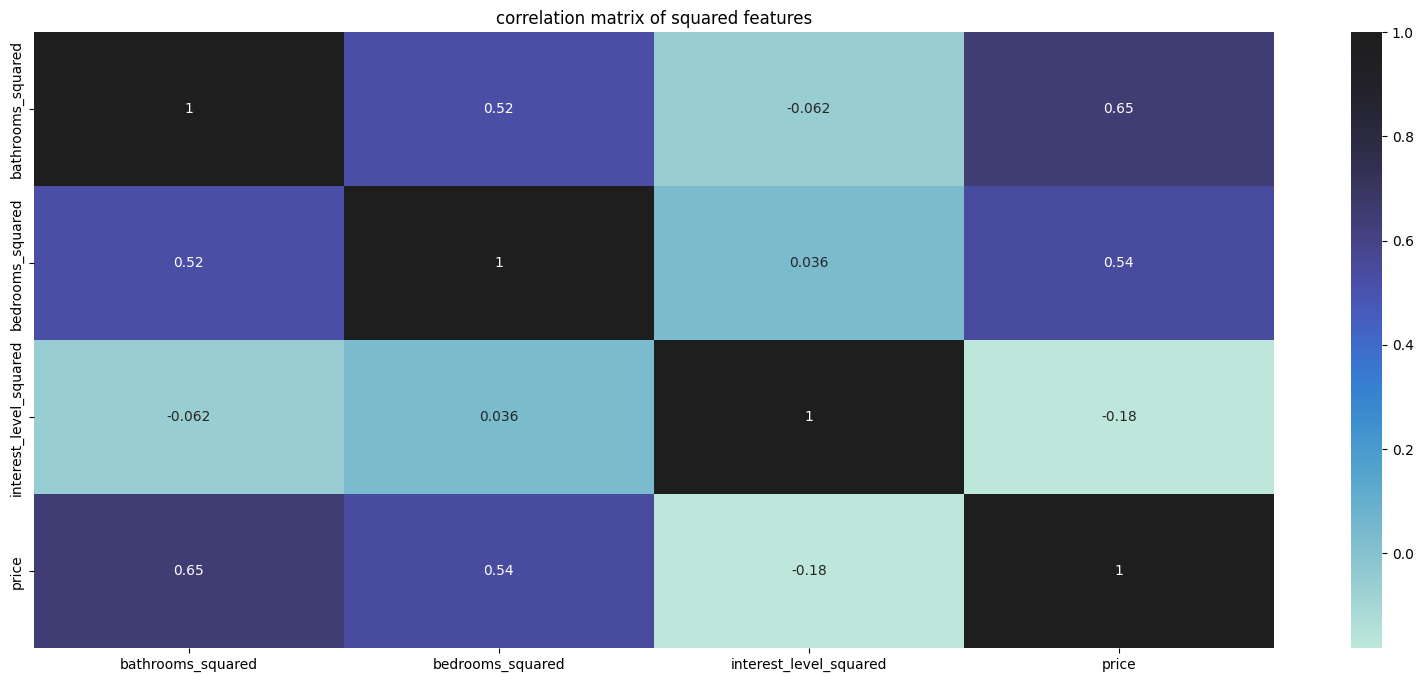

In [124]:
corr_squared=squared.corr()
plt.figure(figsize=(20,8))
sns.set_palette("mako")
sns.heatmap(corr_squared, annot=True, center=True)
plt.title('correlation matrix of squared features')
plt.show()

In [125]:
corr_squared

,bathrooms_squared,bedrooms_squared,interest_level_squared,price
bathrooms_squared,1.000000,0.521951,-0.061563,0.646949
bedrooms_squared,0.521951,1.000000,0.036408,0.544612
interest_level_squared,-0.061563,0.036408,1.000000,-0.182283
price,0.646949,0.544612,-0.182283,1.000000


no, the new features are not more correlated with the target than the basic features because correlation coefficient is almost the same

In [126]:
model_df=df[['bathrooms','bedrooms', 'price']]

In [128]:
X=model_df[['bathrooms','bedrooms']] #features
Y=model_df['price'] #target
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21) 
poly=PolynomialFeatures(degree=10)
X_train_pol=poly.fit_transform(X_train)
x_test_pol=poly.fit_transform(x_test)

### Training of models

In [129]:
result_MAE=pd.DataFrame(columns=[ 'model', 'train', 'test'])
result_RMSE=pd.DataFrame(columns=[ 'model', 'train', 'test'])

Linear Regression

In [130]:
lr=LinearRegression()
lr.fit(X_train_pol, Y_train)

LinearRegression()

In [131]:
lr_y_train=lr.predict(X_train_pol)
lr_y_test=lr.predict(x_test_pol)

In [132]:
MAE_train_lr=mae(Y_train, lr_y_train)
MAE_test_lr=mae(y_test, lr_y_test)
result_MAE.loc[len(result_MAE)]=['LinearRegression', MAE_train_lr, MAE_test_lr]


In [133]:
RMSE_train_lr=rmse(Y_train, lr_y_train)
RMSE_test_lr=rmse(y_test, lr_y_test)
result_RMSE.loc[len(result_RMSE)]=['LinearRegression', RMSE_train_lr, RMSE_test_lr]


Decision Tree

In [136]:
tree=DecisionTreeClassifier(random_state=21)
tree.fit(X_train_pol, Y_train)

DecisionTreeClassifier(random_state=21)

In [137]:
tree_y_train=tree.predict(X_train_pol)
tree_y_test=tree.predict(x_test_pol)

In [138]:
MAE_train_tree=mae(Y_train, tree_y_train)
MAE_test_tree=mae(y_test, tree_y_test)
result_MAE.loc[len(result_MAE)]=['DecisionTree', MAE_train_tree, MAE_test_tree]

In [139]:
RMSE_train_tree=rmse(Y_train, tree_y_train)
RMSE_test_tree=rmse(y_test, tree_y_test)
result_RMSE.loc[len(result_RMSE)]=['DecisionTree', RMSE_train_tree, RMSE_test_tree]

Naive Models

In [143]:
mean_y_train=Y_train.mean()
mean_y_test=y_test.mean()

In [144]:
median_y_train=Y_train.median()
median_y_test=y_test.median()

In [148]:
mean_pred_train = np.full_like(Y_train, fill_value=mean_y_train)
mean_pred_test = np.full_like(y_test, fill_value=mean_y_test)

In [153]:
median_pred_train = np.full_like(Y_train, fill_value=median_y_train)
median_pred_test = np.full_like(y_test, fill_value=median_y_test)

In [149]:
mae_mean_train=mae(Y_train, mean_pred_train)
mae_mean_test=mae(y_test, mean_pred_test)

In [150]:
result_MAE.loc[len(result_MAE)]=['Naive-mean', mae_mean_train, mae_mean_test]

In [151]:
rmse_mean_train=rmse(Y_train, mean_pred_train)
rmse_mean_test=rmse(y_test, mean_pred_test)

In [152]:
result_RMSE.loc[len(result_RMSE)]=['Naive-mean', rmse_mean_train, rmse_mean_test]

In [155]:
mae_median_train=mae(Y_train, median_pred_train)
mae_median_test=mae(y_test, median_pred_test)
result_MAE.loc[len(result_MAE)]=['Naive-median', mae_median_train, mae_median_test]

In [158]:
rmse_median_train=rmse(Y_train, median_pred_train)
rmse_median_test=rmse(y_test, median_pred_test)
result_RMSE.loc[len(result_MAE)]=['Naive-median', rmse_median_train, rmse_median_test]

In [160]:
result_MAE

,model,train,test
0,LinearRegression,752.670572,798.853451
1,DecisionTree,795.702177,807.609577
2,Naive-mean,1131.595620,1144.387010
3,Naive-median,1079.734162,1092.166408


In [161]:
result_RMSE

,model,train,test
0,LinearRegression,1070.302933,3959.217377
1,DecisionTree,1163.522260,1181.689920
2,Naive-mean,1580.460891,1606.034116
5,Naive-median,1626.873056,1651.661962
